## 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，   
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。   

* Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
* Q2: 測試資料集是否有遺失值?
* Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   


In [1]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [2]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
# 把兩個訓練資料集和測試資料集讀進來
df_train = pd.read_csv("Titanic_train.csv")
df_test = pd.read_csv("Titanic_test.csv")


## Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [4]:
# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?
'''
暗示，可以用那些函數，來看出資料的欄位變數
'''

df_train.info()
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

## A1 : Test 資料集沒有 'Survived'

## Q2: 測試資料集是否有遺失值?

In [5]:
#可以嘗試用範例的程式 有遺失值
print(df_test.isnull().any())


PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool


## Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

In [16]:
#合併資料
data = df_train.append(df_test)
print(data.info())
print('Age 遺失個數=',data['Age'].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
None
Age 遺失個數= 263


In [17]:
# 以 XXX 為例，先看 Cabin  出現值的特性
print(data["Age"].value_counts())



24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
         ..
76.00     1
22.50     1
74.00     1
80.00     1
0.67      1
Name: Age, Length: 98, dtype: int64


29.69911764705882
14.526497332334044


C:\Users\Ray\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


29.581560044893376
14.554589813600963


C:\Users\Ray\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


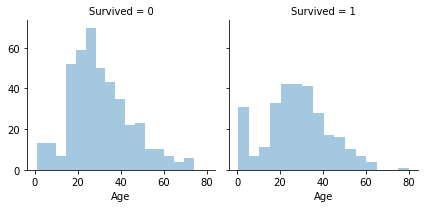

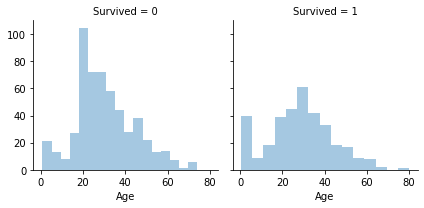

In [23]:
# 我們以  Age 為例，進行，由後往前補
#補值前 平均值
df_train = pd.read_csv("Titanic_train.csv")
print(df_train['Age'].mean())
print(df_train['Age'].std()) #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)
#補值後
df_train['Age']=df_train['Age'].fillna(method='pad')
print(df_train['Age'].mean())
print(df_train['Age'].std()) #age標準差
df_train[df_train['Age'].isnull().values==True]
#補平均數，平均數上沒有差異性，標準差接近
# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)
